In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from utils import load_metadata, load_trial, load_footsteps, load_processed_standing

In [2]:
# create colormap for plotting
jet = mpl.colormaps['jet'](np.linspace(0, 1, 256))
jet[0] = [0,0,0,1]
cmap = mpl.colors.ListedColormap(jet)

#### Load Data from One Walking Trial

In [3]:
# selected trial
participant_id = 56 # possible values: integers from 1 - 150
shoe_type = 'P1' # possible values: 'BF', 'ST', 'P1', 'P2'
walk_condition = 'W1' # possible values: 'W1', 'W2', 'W3', 'W4'

Load Footstep Metadata

In [4]:
metadata = load_metadata(participant_id, shoe_type, walk_condition)
metadata

,ParticipantID,Footwear,Speed,FootstepID,PassID,StartFrame,EndFrame,Ymin,Ymax,Xmin,...,Side,Standing,Incomplete,Rscore,Outlier,Exclude,RotationAngle,FootLength,FootWidth,MeanPressure
0,56,P1,W1,0,0,200,302,30,91,142,...,Right,0,0,2.155274,1,1,12.484727,61.0,22.0,35389.277228
1,56,P1,W1,1,0,279,373,160,220,178,...,Left,0,0,0.937909,0,0,-17.194879,61.0,22.0,29768.009901
2,56,P1,W1,2,0,350,438,294,354,157,...,Right,0,0,0.951192,0,0,13.200929,61.0,25.0,26303.633663
3,56,P1,W1,3,0,416,500,426,485,187,...,Left,0,0,1.300796,0,0,-15.069360,60.0,21.0,41016.792079
4,56,P1,W1,4,0,479,573,558,621,158,...,Right,0,0,0.841898,0,0,15.515631,63.0,20.0,31356.257426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,56,P1,W1,85,14,8551,8639,151,210,149,...,Right,0,0,0.637297,0,0,16.749336,60.0,22.0,29853.326733
86,56,P1,W1,86,14,8617,8701,273,334,188,...,Left,0,0,0.695449,0,0,-12.964484,62.0,22.0,35082.277228
87,56,P1,W1,87,14,8679,8768,403,463,141,...,Right,0,0,0.671366,0,0,14.252977,61.0,22.0,28435.594059
88,56,P1,W1,88,14,8744,8836,522,581,178,...,Left,0,0,0.408191,0,0,-18.053364,60.0,21.0,27770.099010


Load Raw Trial Recording

Tensor size (frames, height, width): (9060, 720, 240)


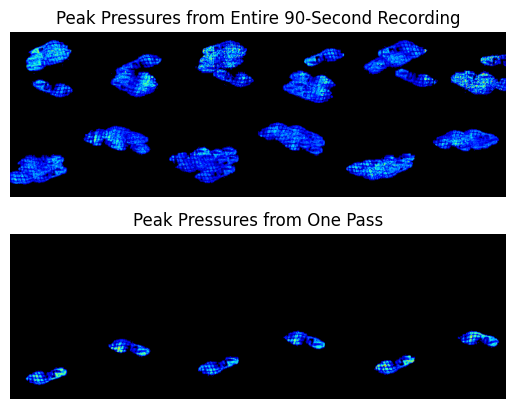

In [5]:
trial = load_trial(participant_id, shoe_type, walk_condition)
print('Tensor size (frames, height, width):',trial.shape)

fig,ax = plt.subplots(2,1)

# display all passes on tiles
img_peak = trial.max(0)
img_peak = np.rot90(img_peak)
ax[0].imshow(img_peak,cmap = cmap)
ax[0].set_title('Peak Pressures from Entire 90-Second Recording')
ax[0].axis('off')

# display one pass across tiles
iPass = 5
pass_idx = np.where(metadata['PassID'] == iPass)[0]
start_t = metadata['StartFrame'][pass_idx[0]]
end_t = metadata['EndFrame'][pass_idx[-1]]
img_peak = trial[start_t:end_t].max(0)
img_peak = np.rot90(img_peak)
ax[1].imshow(img_peak,cmap = cmap)
ax[1].set_title('Peak Pressures from One Pass')
ax[1].axis('off')
plt.show()

Load Extracted Footsteps (Normalization Pipeline 1)

Tensor size (n_steps, frames, height, width): (90, 101, 75, 40)


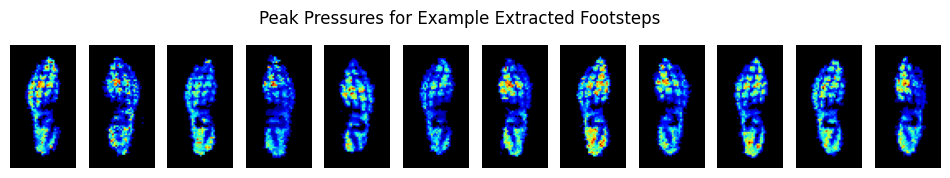

In [6]:
footsteps = load_footsteps(participant_id, shoe_type, walk_condition,pipeline = 1)
print('Tensor size (n_steps, frames, height, width):',footsteps.shape)

# exclude outlier and partial footsteps 
footsteps = footsteps[metadata['Exclude'] == False]

# plot the peak pressures for the first 12 steps
fig,ax = plt.subplots(1,12,figsize = (12,2))
for iFootstep in range(12):
    img_peak = footsteps[iFootstep].max(0)
    ax[iFootstep].imshow(img_peak,cmap = cmap)
    ax[iFootstep].axis('off')
plt.suptitle('Peak Pressures for Example Extracted Footsteps')
plt.show()

#### Load Data from One Standing Trial

In [7]:
# selected trial
participant_id = 145 # possible values: integers from 1 - 150
shoe_type = 'P1' # possible values: 'BF', 'ST', 'P1', 'P2'
stand_condition = 'S2' # possible values: 'S1', 'S2', 'S3'

Load Raw Trial Recording

Tensor size (frames, height, width): (3030, 720, 240)


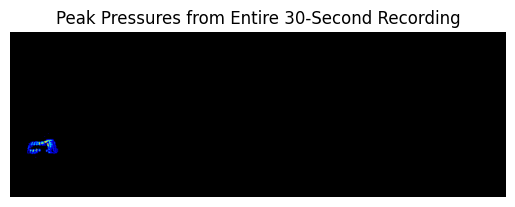

In [8]:
trial = load_trial(participant_id, shoe_type, stand_condition)
print('Tensor size (frames, height, width):',trial.shape)

fig,ax = plt.subplots()

# display raw trial
img_peak = trial.max(0)
img_peak = np.rot90(img_peak)
ax.imshow(img_peak,cmap = cmap)
ax.set_title('Peak Pressures from Entire 30-Second Recording')
ax.axis('off')
plt.show()

Load Processed Standing Trial

Tensor size (frames, height, width): (3000, 180, 180)


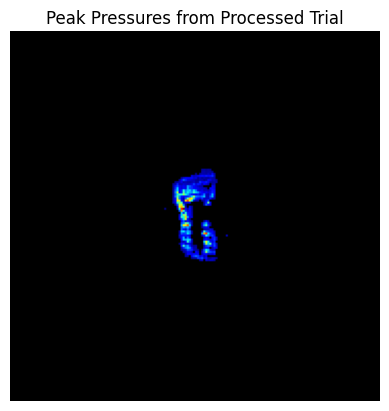

In [9]:
trial = load_processed_standing(participant_id, shoe_type, stand_condition)
print('Tensor size (frames, height, width):',trial.shape)

fig,ax = plt.subplots()

# display preprocessed trial
img_peak = trial.max(0)
ax.imshow(img_peak,cmap = cmap)
ax.set_title('Peak Pressures from Processed Trial')
ax.axis('off')
plt.show()